# MNIST 손글씨 인식하기 : 데이터 전처리

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트 이미지 수 : %d 개' % (X_test.shape[0]))

11501568/11490434 [==============================] - 1s 0us/step
학습셋 이미지 수 : 60000 개
테스트 이미지 수 : 10000 개


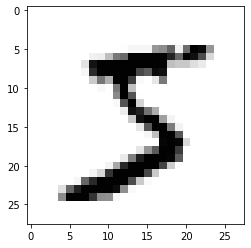

In [4]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [9]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [10]:
# 클래스 값 확인
print('class : %d' % (Y_class_train[0]))

class : 5


In [11]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MNIST 손글씨 인식하기 : 기본 프레임

In [12]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [14]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [19]:
# MNIST 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [20]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
# 모델 최적화 설정
MODEL_DIR = './model/mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
    
modelpath = "./model/mnist/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [27]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.08338, saving model to ./model/mnist\01-0.0834.hdf5

Epoch 00002: val_loss improved from 0.08338 to 0.07437, saving model to ./model/mnist\02-0.0744.hdf5

Epoch 00003: val_loss improved from 0.07437 to 0.07313, saving model to ./model/mnist\03-0.0731.hdf5

Epoch 00004: val_loss improved from 0.07313 to 0.06871, saving model to ./model/mnist\04-0.0687.hdf5

Epoch 00005: val_loss improved from 0.06871 to 0.06657, saving model to ./model/mnist\05-0.0666.hdf5

Epoch 00006: val_loss improved from 0.06657 to 0.06526, saving model to ./model/mnist\06-0.0653.hdf5

Epoch 00007: val_loss did not improve from 0.06526

Epoch 00008: val_loss improved from 0.06526 to 0.06414, saving model to ./model/mnist\08-0.0641.hdf5

Epoch 00009: val_loss did not improve from 0.06414

Epoch 00010: val_loss improved from 0.06414 to 0.06134, saving model to ./model/mnist\10-0.0613.hdf5

Epoch 00011: val_loss did not improve from 0.06134

Epoch 00012: val_loss did not i

In [28]:
# 테스트 정확도 출력
print('Test Accuracy : %.4f' % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9830
Test Accuracy : 0.9830


In [29]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

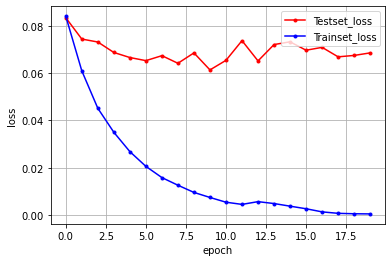

In [30]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# MNIST 손글씨 인식하기 : 컨볼루션 신경망 적용

In [49]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [51]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [62]:
# MNIST 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [65]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [66]:
# 모델 최적화 설정
MODEL_DIR = './model/mnist/convolution/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
    
modelpath = "./model/mnist/convolution/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [67]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.05908, saving model to ./model/mnist/convolution\01-0.0591.hdf5

Epoch 00002: val_loss improved from 0.05908 to 0.03985, saving model to ./model/mnist/convolution\02-0.0399.hdf5

Epoch 00003: val_loss improved from 0.03985 to 0.03475, saving model to ./model/mnist/convolution\03-0.0348.hdf5

Epoch 00004: val_loss did not improve from 0.03475

Epoch 00005: val_loss improved from 0.03475 to 0.03232, saving model to ./model/mnist/convolution\05-0.0323.hdf5

Epoch 00006: val_loss improved from 0.03232 to 0.03163, saving model to ./model/mnist/convolution\06-0.0316.hdf5

Epoch 00007: val_loss improved from 0.03163 to 0.02875, saving model to ./model/mnist/convolution\07-0.0287.hdf5

Epoch 00008: val_loss did not improve from 0.02875

Epoch 00009: val_loss did not improve from 0.02875

Epoch 00010: val_loss improved from 0.02875 to 0.02574, saving model to ./model/mnist/convolution\10-0.0257.hdf5

Epoch 00011: val_loss did not improve from 0.0257

In [68]:
# 테스트 정확도 출력
print('Test Accuracy : %.4f' % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 5s 15ms/step - loss: 0.0336 - accuracy: 0.9922
Test Accuracy : 0.9922


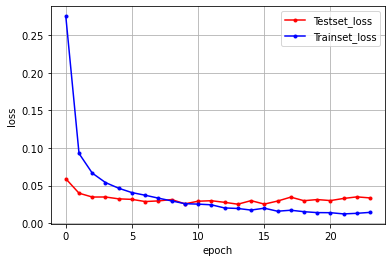

In [69]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 주어진 문장을 '단어'로 토큰화 하기

In [70]:
# 텍스트 전처리 함수 text_toword_sequence() 호출
from tensorflow.keras.preprocessing.text import text_to_word_sequencequence

In [71]:
# 전처리할 텍스트 정하기
text = '해보지 않으면 해낼 수 없다'

In [72]:
# 해당 텍스트 토큰화
result = text_to_word_sequence(text)
print("원문 : \n", text)
print("\n토큰화 : \n", result)

원문 : 
 해보지 않으면 해낼 수 없다

토큰화 : 
 ['해보지', '않으면', '해낼', '수', '없다']


In [73]:
# 텍스트 전처리 함수 Tokenizer() 호출
from keras.preprocessing.text import Tokenizer

In [74]:
# 전처리하려는 세 개의 문장 정하기
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용할 수 있습니다.'
       ]

In [75]:
# 토큰화 함수를 이용해 전처리하는 과정
token = Tokenizer() # 토큰화 함수 지정
token.fit_on_texts(docs) # 토큰화 함수에 문장 적용하기

In [76]:
# 각 옵션에 맞춰 단어의 빈도 수를 계산한 결과 출력
print('단어 카운트 : \n', token.word_counts)

단어 카운트 : 
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [77]:
# 출력되는 순서는 랜덤
print('문장 카운트 :', token.document_count)
print('각 단어가 몇 개의 문장에 포함되어 있는가 : \n', token.word_docs)
print('각 단어에 매겨진 인덱스 값 : \n', token.word_index)

문장 카운트 : 3
각 단어가 몇 개의 문장에 포함되어 있는가 : 
 defaultdict(<class 'int'>, {'합니다': 1, '토큰화': 3, '먼저': 1, '나누어': 1, '단어를': 1, '텍스트의': 2, '각': 1, '인식됩니다': 1, '딥러닝에서': 2, '단어로': 1, '해야': 1, '결과는': 1, '한': 1, '사용할': 1, '있습니다': 1, '수': 1})
각 단어에 매겨진 인덱스 값 : 
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


# 영화 리뷰가 긍정적인지 부정적인지 예측하기

In [78]:
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [79]:
# 텍스트 리뷰 자료 지정
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다",
        "한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요",
        "연기가 어색해요","재미없어요"]

In [80]:
# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [81]:
# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index) # 토큰화 된 결과를 출력해 확인

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [85]:
# 토큰에 지정된 인덱스로 새로운 배열 생성
x = token.texts_to_sequences(docs)
print(x)

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [86]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞춤
padded_x = pad_sequences(x, 4)
'\n패딩 결과\n', print(padded_x)

[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


('\n패딩 결과\n', None)

In [87]:
# 임베딩에 입력될 단어 수 지정
word_size = len(token.word_index) + 1

In [89]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과 출력
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# 모델 실행
model.fit(padded_x, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.7021 - accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6998 - accuracy: 0.2000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.3000
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.9000
Epoch 11/20
1/1 [=======================

In [90]:
# 정확도 출력
print('Accuracy : %.4f' % (model.evaluate(padded_x, classes)[1]))

1/1 [==============================] - 0s 295ms/step - loss: 0.6562 - accuracy: 1.0000
Accuracy : 1.0000


# LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [91]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [93]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [94]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [95]:
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [97]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [98]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [99]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [100]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 15s 147ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 12s 137ms/step - loss: 2.0361 - accuracy: 0.4903 - val_loss: 1.9443 - val_accuracy: 0.5111
Epoch 3/20
90/90 [==============================] - 13s 140ms/step - loss: 1.8448 - accuracy: 0.5236 - val_loss: 1.7619 - val_accuracy: 0.5459
Epoch 4/20
90/90 [==============================] - 12s 138ms/step - loss: 1.6958 - accuracy: 0.5582 - val_loss: 1.7201 - val_accuracy: 0.5490
Epoch 5/20
90/90 [==============================] - 13s 141ms/step - loss: 1.6685 - accuracy: 0.5729 - val_loss: 1.7045 - val_accuracy: 0.5766
Epoch 6/20
90/90 [==============================] - 14s 151ms/step - loss: 1.8529 - accuracy: 0.5169 - val_loss: 1.7842 - val_accuracy: 0.5557
Epoch 7/20
90/90 [==============================] - 12s 138ms/step - loss: 1.6076 - accuracy: 0.5922 - val_loss: 1.6542 - val_accuracy: 0.5895

In [101]:
# 테스트 정확도 출력
print('Test Accuracy : %.4f' % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 2s 24ms/step - loss: 1.2874 - accuracy: 0.6972
Test Accuracy : 0.6972


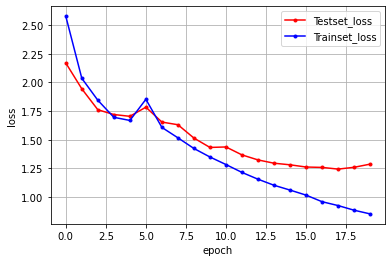

In [102]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# LSTM과 CNN을 조합해 영화 리뷰 분류하기

In [105]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [107]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [108]:
# 학습셋과 테스트셋 지정하기
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

17473536/17464789 [==============================] - 1s 0us/step


In [111]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_12 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_18 (Dense)            (None, 1)                 56        
                                                     

In [112]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [113]:
# 모델의 실행
history = model.fit(x_train, Y_train, batch_size=100, epochs=5, validation_data=(x_test, Y_test))

Epoch 1/5
250/250 [==============================] - 18s 69ms/step - loss: 0.4501 - accuracy: 0.7725 - val_loss: 0.3614 - val_accuracy: 0.8411
Epoch 2/5
250/250 [==============================] - 17s 68ms/step - loss: 0.2983 - accuracy: 0.8738 - val_loss: 0.3402 - val_accuracy: 0.8508
Epoch 3/5
250/250 [==============================] - 16s 65ms/step - loss: 0.2540 - accuracy: 0.8952 - val_loss: 0.3404 - val_accuracy: 0.8558
Epoch 4/5
250/250 [==============================] - 16s 65ms/step - loss: 0.2190 - accuracy: 0.9130 - val_loss: 0.3278 - val_accuracy: 0.8571
Epoch 5/5
250/250 [==============================] - 16s 65ms/step - loss: 0.1852 - accuracy: 0.9284 - val_loss: 0.3512 - val_accuracy: 0.8548


In [115]:
# 테스트 정확도 출력
print('Test Accuracy : %.4f' % (model.evaluate(x_test, Y_test)[1]))

782/782 [==============================] - 6s 7ms/step - loss: 0.3512 - accuracy: 0.8548
Test Accuracy : 0.8548


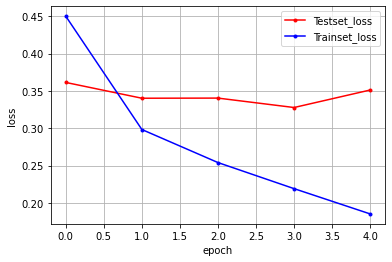

In [116]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()